In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from DENCLUE import DENCLUE
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('glass-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
df_normalized.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.387056,0.127381,0.553080,-0.310744,-0.498534,-0.296275,-0.063113,-0.155646,-0.258803
1,-0.174042,0.425729,0.456357,-0.129105,0.069267,-0.020674,-0.564066,-0.252557,-0.419945
2,-0.471910,0.101802,0.398255,0.120512,0.285714,-0.110053,-0.543668,-0.233058,-0.387521
3,-0.188254,-0.197302,0.581264,-0.266983,-0.048343,0.090402,-0.427411,-0.293041,-0.487260
4,-0.222816,-0.119597,0.474686,-0.307694,0.399909,0.057016,-0.451643,-0.257117,-0.427526


In [5]:
data_array = df_normalized.values
data_list = data_array.tolist()
X = data_list
x = data_array 

In [6]:
X = df_normalized.values  # Convert DataFrame to numpy array

# Instantiate and fit the DENCLUE model
denclue = DENCLUE(h = 0.25, eps = 1e-8, min_density = 1.0)
denclue.fit(X)

DENCLUE(h=0.25, min_density=1.0)

In [7]:
labels = denclue.labels_

print(set(labels))
print(labels)

{0.0, 1.0, 2.0, 4.0, 14.0, 19.0, -1.0}
[ 0.  1.  1.  1.  1.  2.  1.  1.  0.  2.  2.  1.  2.  2.  1.  1.  1.  0.
  0.  1.  2.  0.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  1.  1.  1.
  0.  1.  0.  1.  1.  1.  0.  2.  0.  2.  0.  0.  0.  0.  2.  1.  1.  2.
  2.  2.  1.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2.  1.
  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  2.
  1.  2.  1.  1.  1.  2.  2.  1.  1.  2.  1.  2.  0.  0.  4. -1.  4.  4.
 -1.  4.  4.  4.  2.  1.  1.  2.  1.  2.  1.  1.  2.  1.  1.  0.  2.  1.
 -1. -1. -1.  4.  4.  1.  2.  1.  2.  2.  1.  1.  1.  1.  2.  2.  1.  2.
  2.  1.  1.  2.  1.  2.  0.  1.  1.  1.  1.  1.  0.  1.  2.  1.  2.  2.
 -1.  4.  4.  4.  4.  4.  4.  4. -1. -1.  4.  2. -1. -1. -1. -1. -1. -1.
 -1. 14. -1. -1. -1. -1.  0. -1. -1. 19. 14. 14. 19. 19. 14. 14. 14. 14.
 14. 14. -1. 14. 19. 14. 19. 19. 19. 14. 14. 19. 19. 19. 19.]


In [8]:
# Calculate metrics
ch_index = calinski_harabasz_score(data_list, labels)
silhouette_avg = silhouette_score(x, labels)
db_index = davies_bouldin_score(x, labels)

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.32609987393729833
Calinski Harabasz Score: 57.018350281198934
Davies Bouldin Index: 1.5585856424108626


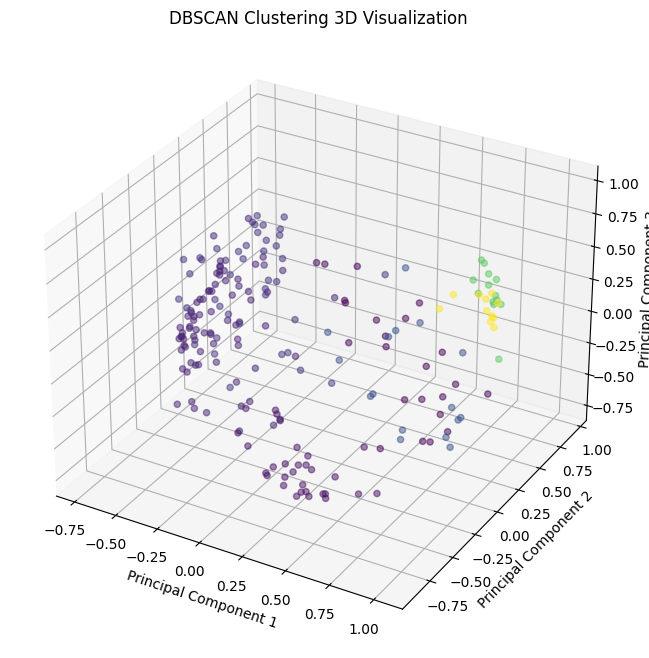

In [9]:
visualization(x, labels)

In [10]:
interactive_visualization(x, labels)